In [185]:
import numpy as np # Numpy Python: Operasi array canggih, fungsi matematika
import pandas as pd # Pustaka analisis dan manipulasi data (DataFrames, Series)
import matplotlib.pyplot as plt # Pustaka plot dan visualisasi
import seaborn as sns # Visualisasi data statistik tingkat tinggi yang estetis

from sklearn.model_selection import train_test_split # Membagi data menjadi set pelatihan dan pengujian
from sklearn.compose import ColumnTransformer # Menerapkan preprocessing berbeda ke kolom berbeda
from sklearn.pipeline import Pipeline # Merangkai transformers dan estimators menjadi satu alur kerja
from sklearn.preprocessing import OneHotEncoder # Mengubah fitur kategorikal menjadi numerikal
from sklearn.metrics import r2_score,mean_absolute_error # Metrik untuk mengevaluasi model regresi

from sklearn.linear_model import LinearRegression,Ridge,Lasso # Regresi linier dan variannya
import pickle

In [186]:
#membaca dataset
df = pd.read_csv('laptop_data.csv')

In [187]:
#menampilkan
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.0
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.0
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.0
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.0
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.0


In [188]:
#jumlah baris dan kolom dataset
df.shape

(1304, 12)

In [189]:
#melihat isi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   float64
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(3), object(9)
memory usage: 122.4+ KB


In [190]:
#tidak ada data yang sama
df.duplicated().sum()

0

In [191]:
#missing value check
df.isnull().sum()

Unnamed: 0          1
Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [192]:
# Hapus kolom tanpa nama
df.drop(columns=['Unnamed: 0'], inplace = True)

In [193]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.0


In [194]:
# Di kolom 'Ram', kami ingin menghapus 'GB'
df['Ram'] = df['Ram'].str.replace('GB','')

In [195]:
# Di kolom 'Weight', kami ingin menghapus 'kg'
df['Weight'] = df['Weight'].str.replace('kg','')

In [196]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.0


In [197]:
# Ubah tipe data 'Ram' dan 'Weight' dari objek menjadi int dan float
df['Ram'] = df['Ram'].str.replace('GB', '').astype('float32').fillna(0).astype('int32')
df['Weight'] = df['Weight'].str.replace('kg','').astype('float32')

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1304 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 102.0+ KB


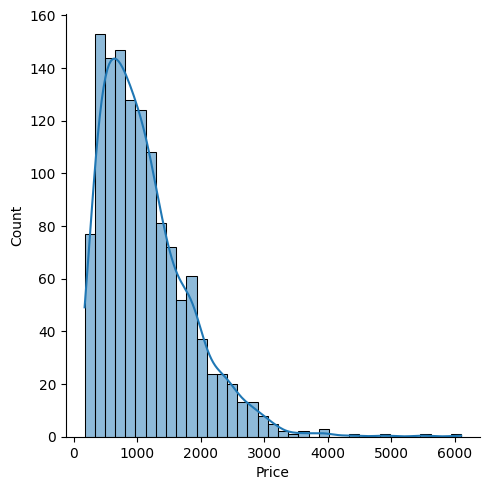

In [199]:
# Analisis Univariat pada Harga
sns.displot(df['Price'], kde=True);

# Kita bisa lihat lebih banyak laptop murah dan lebih sedikit yang mahal, yang mana hal ini cukup normal.

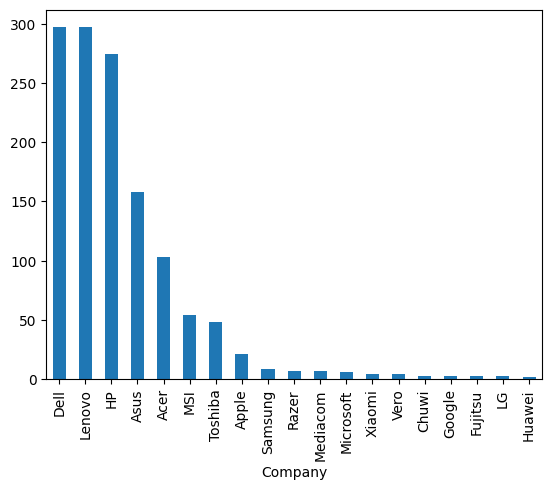

In [200]:
# Jumlah laptop per merk
df['Company'].value_counts().plot(kind='bar');

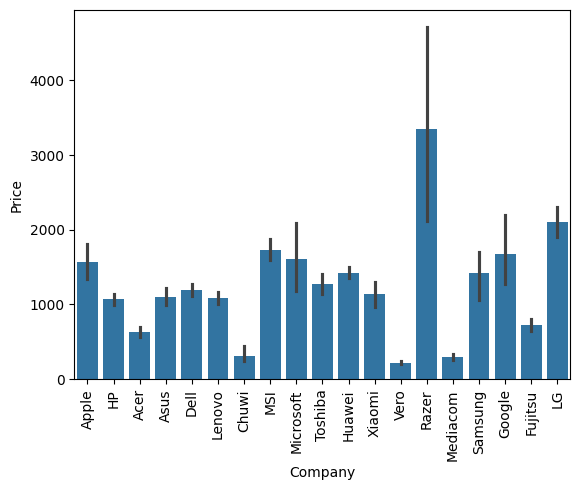

In [201]:
# Nilai harga rata-rata setiap merek
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show();

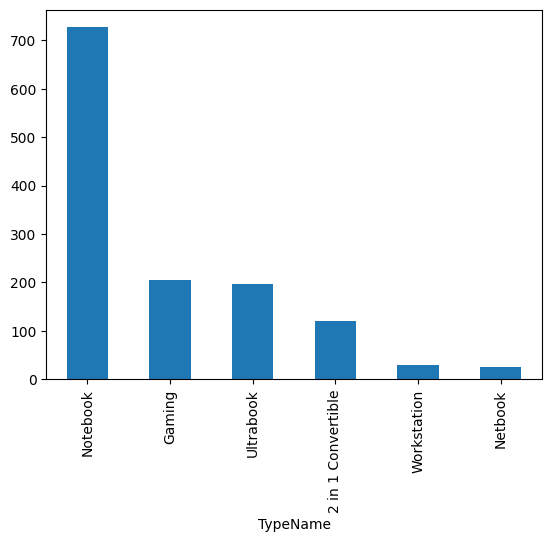

In [202]:
# Jumlah Jenis Laptop
df['TypeName'].value_counts().plot(kind='bar');

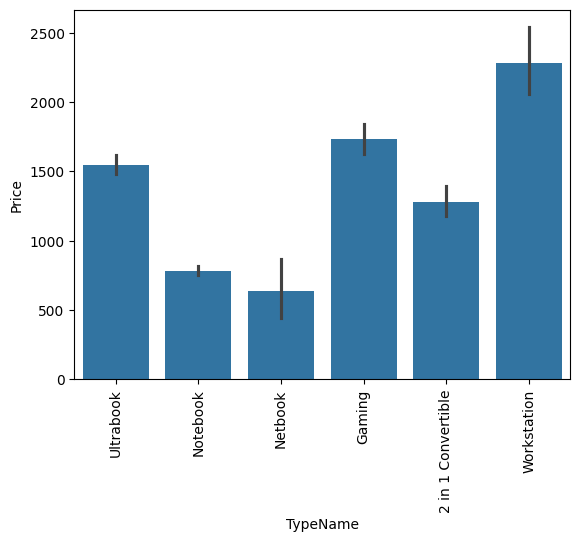

In [203]:
# Nilai rata-rata setiap jenis laptop
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show();

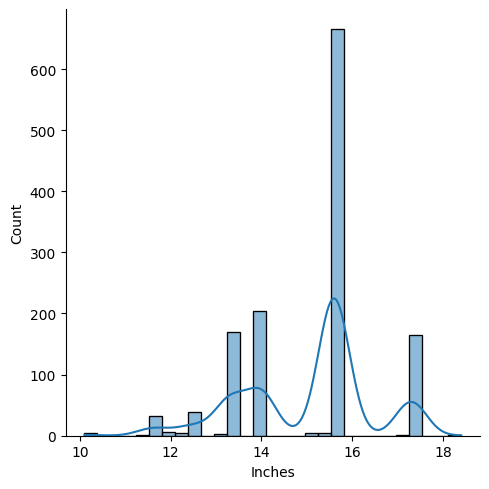

In [204]:
# Jumlah jenis ukuran layar
sns.displot(df['Inches'], kde=True);

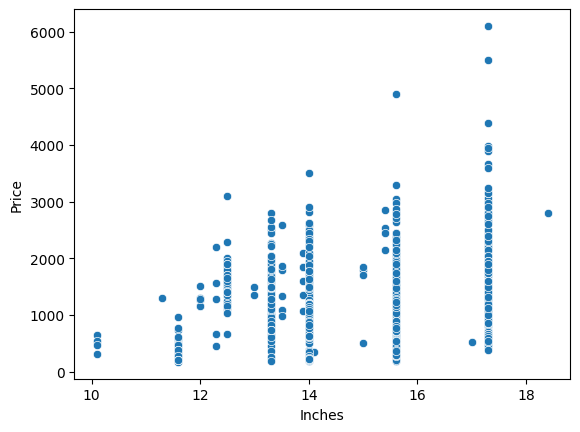

In [205]:
#scatterplot harga dan inch, dimana makin tinggi inch rata rata harganya semakin mahal
sns.scatterplot(x=df['Inches'], y=df['Price']);

In [206]:
# analisis resolusi layar
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [207]:
# membuat kolom- Touchscreen
df['Touchscreen'] = df['ScreenResolution'].astype(str).apply(lambda x:1 if 'Touchscreen' in x else 0)

In [208]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
324,Acer,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8,256GB SSD,AMD Radeon RX 540,Windows 10,2.20,659.0,0
982,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.20,549.0,0
549,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.99,1729.0,0
604,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M420,Linux,2.18,465.0,0
985,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon R5 M430,Windows 10,2.25,599.0,0


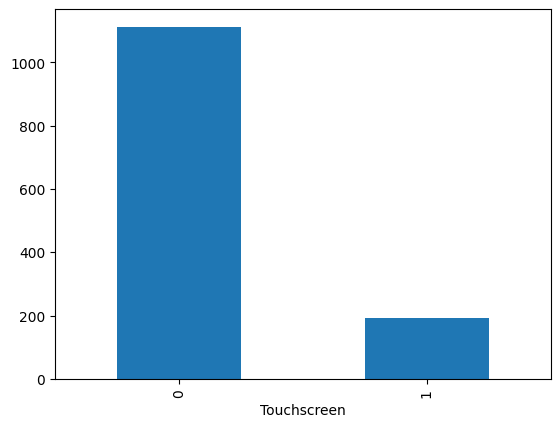

In [209]:
# menghitung Touchscreen and Non-touchscreen Laptop
df['Touchscreen'].value_counts().plot(kind='bar');

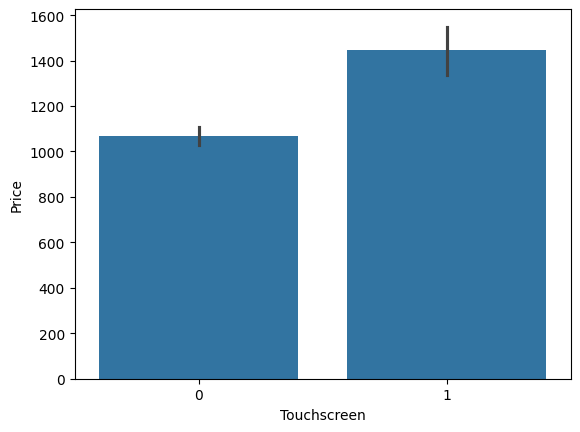

In [210]:
# variasi harga antara tounchscreen dengan non touch screen
sns.barplot(x=df['Touchscreen'], y=df['Price']);

In [211]:
# membuat kolom ips
df['Ips'] = df['ScreenResolution'].astype(str).apply(lambda x:1 if 'IPS' in x else 0)

In [212]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
91,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce MX150,Windows 10,2.20,689.0,0,0
864,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29,2240.0,1,0
736,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia Quadro M2200,Windows 10,2.60,2419.0,0,0
1040,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.80,847.0,1,1
53,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,1103.0,0,0


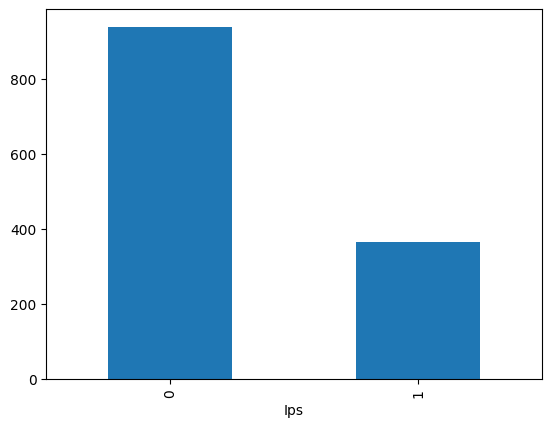

In [213]:
# menghitung IPS and Non-IPS Laptop
df['Ips'].value_counts().plot(kind='bar');

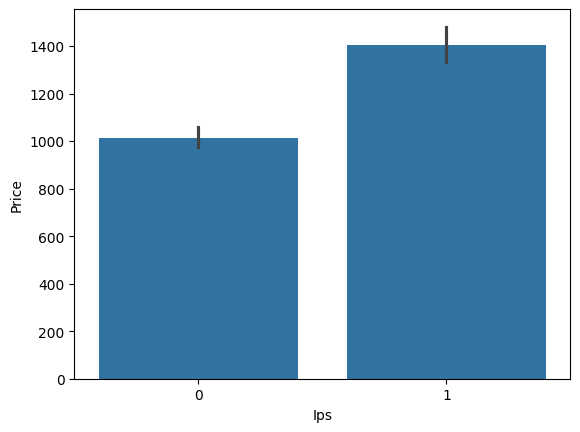

In [214]:
# variasi harga antara IPS and Non-IPS Laptop
sns.barplot(x=df['Ips'], y=df['Price']);

In [215]:
# split resolusi layar menjadi dua kolom
new = df['ScreenResolution'].str.split('x', expand=True)
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [216]:
# membuat kolom X_res & Y_res
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [217]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.0,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.0,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.0,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.0,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.0,0,1,IPS Panel Retina Display 2560,1600


In [218]:
# Perlu beberapa perubahan pada kolom X_res dan penggunaan Ekspresi Reguler
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0] if x and isinstance(x, list) else None)

In [219]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.0,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.0,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.0,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.0,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.0,0,1,2560,1600


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1304 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1304 non-null   int64  
 12  Ips               1304 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.8+ KB


In [221]:
# Masih X_res & Y_res adalah tipe data objek, kita perlu mengonversinya menjadi integer
df['X_res'] = df['X_res'].astype(float).astype('Int64')
df['Y_res'] = df['Y_res'].astype(float).astype('Int64')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1304 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1304 non-null   int64  
 12  Ips               1304 non-null   int64  
 13  X_res             1303 non-null   Int64  
 14  Y_res             1303 non-null   Int64  
dtypes: Int64(2), float32(1), float64(2), int32(1), int64(2), object(7)
memory usage: 145.3+ K

In [223]:
# Pilih hanya kolom numerik sebelum menghitung korelasi
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['Price']

Inches         0.068156
Ram            0.743012
Weight         0.210343
Price          1.000000
Touchscreen    0.191261
Ips            0.252240
X_res          0.556560
Y_res          0.552837
Name: Price, dtype: float64

In [224]:
#menghitung PPI
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [225]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.0,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.0,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.0,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.0,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.0,0,1,2560,1600,226.983005


In [226]:
# Pilih hanya kolom numerik sebelum menghitung korelasi
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['Price']

Inches         0.068156
Ram            0.743012
Weight         0.210343
Price          1.000000
Touchscreen    0.191261
Ips            0.252240
X_res          0.556560
Y_res          0.552837
ppi            0.473528
Name: Price, dtype: float64

In [227]:
# Hilangkan ScreenResolution, Inches, Kolom X_res & Y_res yang tidak kita perlukan lagi.
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'], inplace=True)

In [228]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.0,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.0,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.0,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.0,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.0,0,1,226.983005


In [229]:
# Jumlah nilai kolom CPU
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [230]:
# Pisahkan dan ambil 3 kata pertama yang dipisah
# Tangani nilai float potensial dengan mengonversinya ke string terlebih dahulu
df['Cpu Name'] = df['Cpu'].astype(str).apply(lambda x:" ".join(x.split()[0:3]))

In [231]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.0,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.0,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.0,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.0,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.0,0,1,226.983005,Intel Core i5


In [232]:
#Singkatnya, fungsi ini mengelompokkan prosesor ke dalam 3 kategori berdasarkan input teks: model Intel Core tertentu, model Intel lainnya, atau prosesor AMD.
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [233]:
#Misalnya, pada baris tertentu, nilai 'Cpu Name' adalah 'Intel Core i5-10300H'. Setelah kode ini dieksekusi, nilai 'Cpu brand' pada baris tersebut akan menjadi 'Intel Core i5'.
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [234]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.0,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.0,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.0,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.0,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.0,0,1,226.983005,Intel Core i5,Intel Core i5


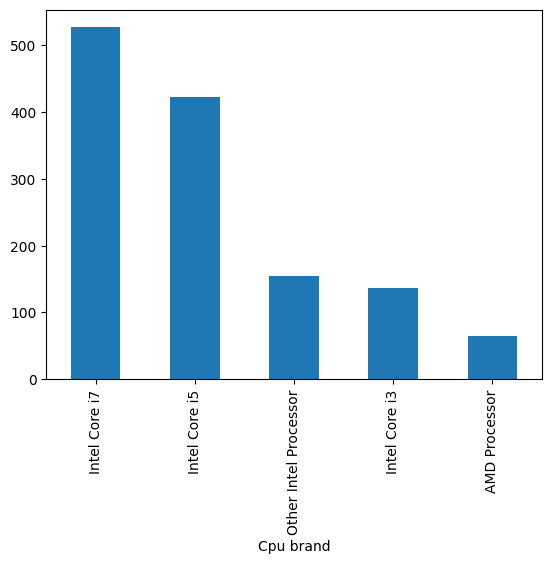

In [235]:
# value penghitungan Cpu brand
df['Cpu brand'].value_counts().plot(kind='bar');

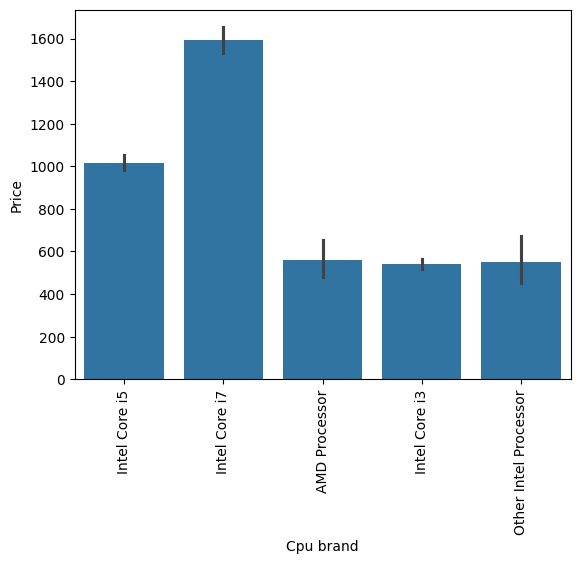

In [236]:
# relasi antara 'Cpu brand' & 'Price'
sns.barplot(x=df['Cpu brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show();

In [237]:
# hapus Cpu & Cpu Name
df.drop(columns=['Cpu','Cpu Name'], inplace=True)

In [238]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.0,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.0,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.0,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.0,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.0,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

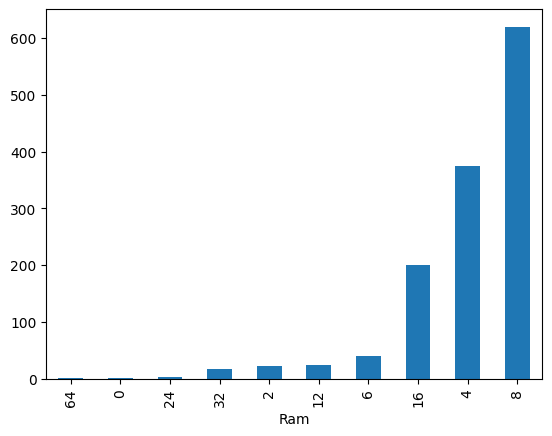

In [239]:
#penghitungan RAM
df['Ram'].value_counts(ascending=True).plot(kind='bar')

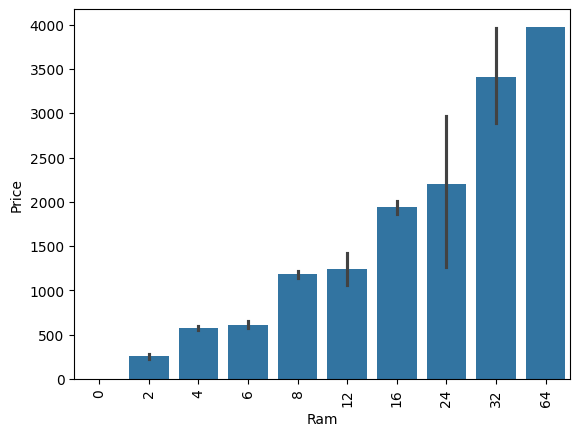

In [240]:
# relasi antara 'Ram' & 'Price'
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show();

In [241]:
# penghitungan pada 'Memory'
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [242]:
# Kode ini bertujuan untuk melakukan feature engineering pada kolom 'Memory' dalam sebuah DataFrame (df). 
#Kode ini akan membagi kolom 'Memory' menjadi 2 lapisan penyimpanan ('first' dan 'second'), mengidentifikasi jenis penyimpanan (HDD, SSD, Hybrid, Flash Storage) pada setiap lapisan, dan membuat kolom-kolom baru yang
#merepresentasikan kapasitas setiap jenis penyimpanan untuk setiap laptop (misalnya kolom 'HDD' akan berisi kapasitas HDD total laptop tersebut). Selanjutnya kode ini akan menghapus kolom-kolom bantu yang digunakan dalam proses ini.
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Fill empty strings in 'first' with 0 before converting to integer
df["first"] = df["first"].replace('', '0')
df["first"] = df["first"].astype(int)

df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [243]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
371,Acer,Notebook,4,128 SSD,AMD Radeon R5,Windows 10,2.10,426.0,0,0,100.454670,AMD Processor,0,128,0,0
575,Mediacom,Notebook,4,32 SSD,Intel HD Graphics,Windows 10,1.40,249.0,0,0,157.350512,Other Intel Processor,0,32,0,0
1063,Dell,Notebook,16,2000 HDD,AMD Radeon R7 M445,Windows 10,2.32,989.0,0,0,141.211998,Intel Core i7,2000,0,0,0
833,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.70,1186.0,0,0,157.350512,Intel Core i5,0,256,0,0
855,Dell,Notebook,8,128 SSD,Intel HD Graphics 620,Windows 10,1.90,945.0,0,0,141.211998,Intel Core i5,0,128,0,0


In [244]:
#hapus kolom memori
df.drop(columns=['Memory'], inplace=True)

In [245]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
680,MSI,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.2,997.0,0,0,141.211998,Intel Core i5,0,256,0,0


In [246]:
# korelasi dengan harga
df_numeric = df.select_dtypes(include=['number'])  # Select only numerical columns
df_numeric.corr()['Price']

Ram              0.743012
Weight           0.210343
Price            1.000000
Touchscreen      0.191261
Ips              0.252240
ppi              0.473528
HDD             -0.096453
SSD              0.670820
Hybrid           0.007953
Flash_Storage   -0.040514
Name: Price, dtype: float64

In [247]:
# Karena korelasi yang lemah dengan harga, kami akan menghentikan Hybrid & Flash_Storage. Kami tetap menggunakan HDD, karena akan memengaruhi harga
# (mis. Memori HDD lebih banyak, harga lebih murah)
df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [248]:
df.sample()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
111,Dell,Ultrabook,8,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.0,1,0,276.05353,Intel Core i7,0,256


In [249]:
# hitung gpu
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [250]:
# Extract nama brand dari gpu
df['Gpu Brand'] = df['Gpu'].astype(str).apply(lambda x: x.split()[0] if x != 'nan' else 'Unknown')

In [251]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.0,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.0,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.0,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.0,0,1,226.983005,Intel Core i5,0,256,Intel


In [252]:
#hitung brand gpu
df['Gpu Brand'].value_counts()

Gpu Brand
Intel      722
Nvidia     400
AMD        180
ARM          1
Unknown      1
Name: count, dtype: int64

In [253]:
# hapus 'ARM'
df = df[df['Gpu Brand'] != 'ARM']

In [254]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel      722
Nvidia     400
AMD        180
Unknown      1
Name: count, dtype: int64

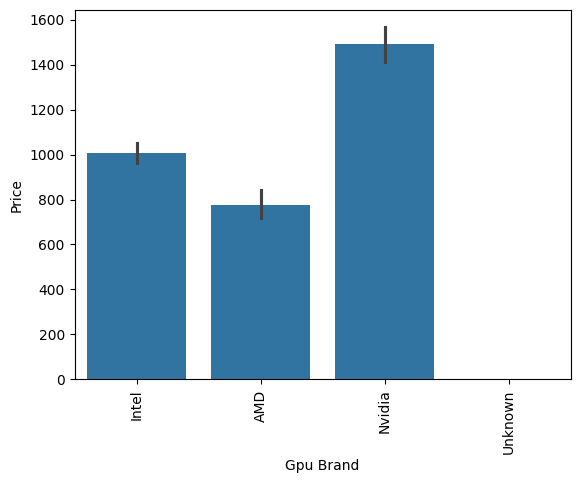

In [255]:
# relasi antara 'Gpu Brand' & 'Price'
sns.barplot(x=df['Gpu Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show();

In [256]:
# Drop kolom 'Gpu' 
df.drop(columns='Gpu', inplace=True)

In [257]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,1339.0,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,575.0,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.0,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.0,0,1,226.983005,Intel Core i5,0,256,Intel


In [258]:
# count OpSys
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

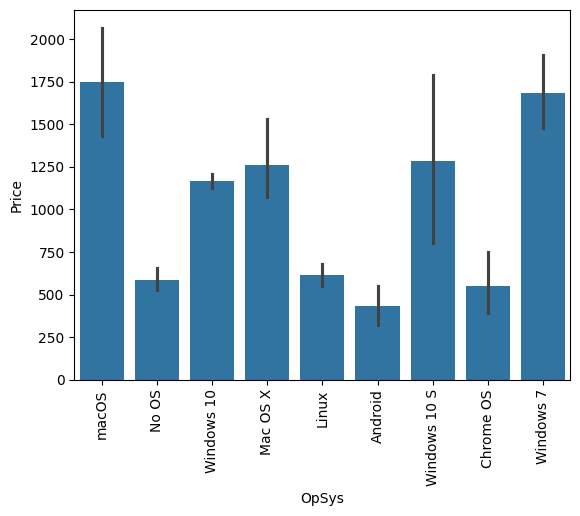

In [259]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show();

In [260]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [261]:
df['os'] = df['OpSys'].apply(cat_os)

In [262]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,1339.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,898.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,575.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,2537.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,1803.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [263]:
# Drop kolom 'OpSys'
df.drop(columns='OpSys', inplace=True)

In [264]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,1339.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


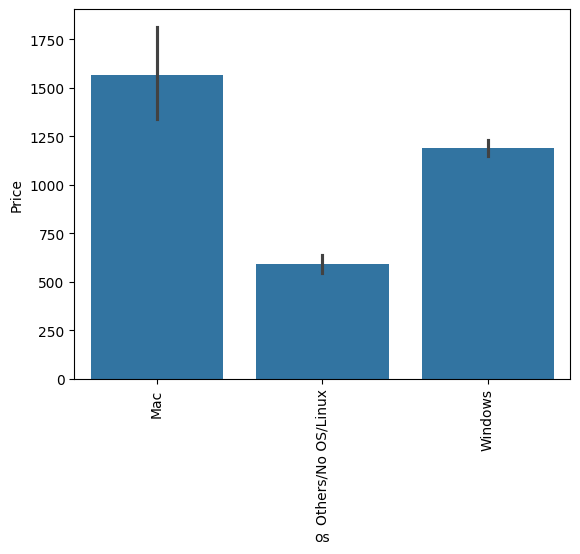

In [265]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show();

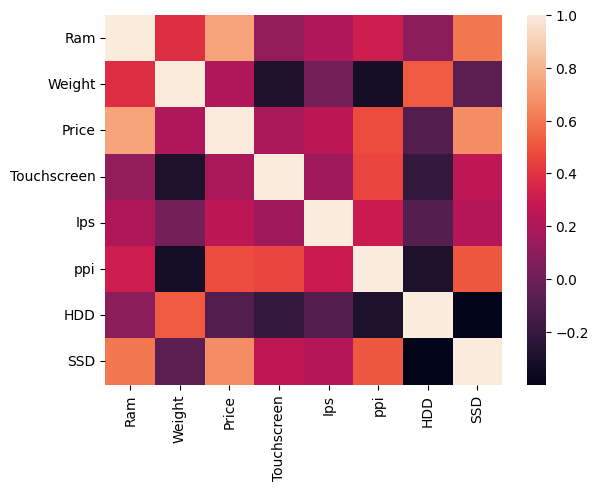

In [266]:
# Pilih hanya kolom numerik untuk perhitungan korelasi
numerical_df = df.select_dtypes(include=['number'])

# Hitung korelasi pada subset numerik
sns.heatmap(numerical_df.corr());

#Heatmap yang dihasilkan akan menunjukkan persegi-persegi yang mewakili setiap pasangan kolom numerik.
#Warna pada setiap persegi mengindikasikan kekuatan dan arah korelasi antara dua kolom tersebut. Diagonal heatmap akan selalu berwarna karena menunjukkan korelasi sempurna antara kolom dengan dirinya sendiri (nilai 1). 
#Dengan mengamati heatmap, kita dapat dengan cepat mengidentifikasi pasangan kolom yang memiliki korelasi kuat (baik positif maupun negatif), yang mungkin berguna untuk analisis lebih lanjut atau pemodelan.

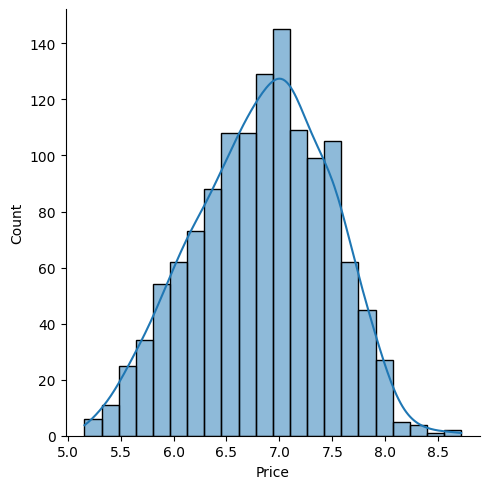

In [267]:
# Plot kolom Target (df['Price'])
# Di sini, kolom 'Price' dimiringkan seperti biasa, kami menghilangkan kemiringan dengan menggunakan transformasi log pada kolom 'Harga'
sns.displot(np.log(df['Price']), kde=True);

In [268]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [269]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows
1302,Asus,Notebook,4,2.20,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows


In [270]:
y

0       7.199678
1       6.800170
2       6.354370
3       7.838738
4       7.497207
          ...   
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
1303         NaN
Name: Price, Length: 1303, dtype: float64

In [271]:
# Split dalam Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [272]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
91,Acer,Notebook,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
940,HP,Gaming,8,2.75,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
1026,HP,Notebook,4,2.31,0,0,111.935204,Intel Core i5,500,0,Intel,Windows
1258,Lenovo,Notebook,8,2.32,0,0,141.211998,Intel Core i7,0,0,AMD,Windows
487,Dell,Notebook,16,2.06,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


Linear Regression


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


R2 score 0.818052380440268
MAE 0.206371287925965



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


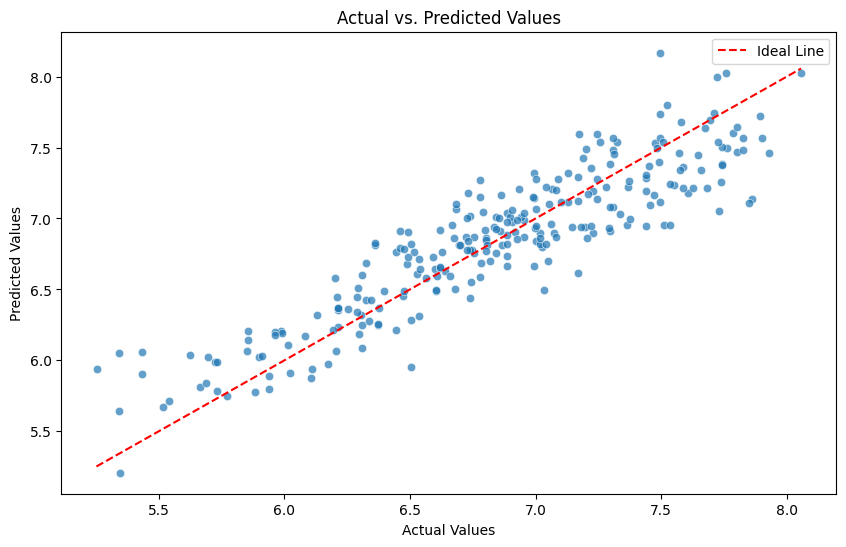

In [273]:
!pip install scikit-learn
!pip install seaborn
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataframe
# df = pd.read_csv('your_dataset.csv') # Uncomment and modify it to load your dataset

# Split the data
# X = df.drop('target_column', axis=1) # Uncomment and modify it to select your features
# y = df['target_column'] # Uncomment and modify it to select your target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer and pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [0,1,7,10,11])
], remainder='passthrough')

# Add SimpleImputer to handle missing values in both X and y
step2_X = SimpleImputer(strategy='mean')
step2_y = SimpleImputer(strategy='mean')

step3 = LinearRegression()

# Create separate pipelines for X and y
pipe_X = Pipeline([
    ('step1', step1),
    ('step2_X', step2_X) # Impute missing values in X
])

pipe_y = Pipeline([
    ('step2_y', step2_y) # Impute missing values in y
])

# Transform X_train and y_train
X_train_transformed = pipe_X.fit_transform(X_train)
y_train_transformed = pipe_y.fit_transform(y_train.values.reshape(-1, 1)).ravel() # Reshape and flatten y

# Fit the model on transformed data
step3.fit(X_train_transformed, y_train_transformed)

# Transform X_test using the fitted pipe_X
X_test_transformed = pipe_X.transform(X_test)

# Make predictions
y_pred = step3.predict(X_test_transformed)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Exporting Model

In [274]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,1339.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [275]:
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe_X, open('pipe_X.pkl', 'wb'))
pickle.dump(step3, open('linear_model.pkl', 'wb'))